<a href="https://colab.research.google.com/github/hewansirak/Brain-Tumor-Classification/blob/master/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 91% 135M/149M [00:00<00:00, 174MB/s]
100% 149M/149M [00:00<00:00, 167MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [ ]:
tr_df = get_class_paths("/content/Training")


In [ ]:
tr_df

,Class Path,Class
0,/content/Training/meningioma/Tr-me_1245.jpg,meningioma
1,/content/Training/meningioma/Tr-me_0590.jpg,meningioma
2,/content/Training/meningioma/Tr-me_0153.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0130.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0024.jpg,meningioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_1392.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_1049.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0248.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0790.jpg,pituitary


In [ ]:
tr_df.head()

,Class Path,Class
0,/content/Training/meningioma/Tr-me_1245.jpg,meningioma
1,/content/Training/meningioma/Tr-me_0590.jpg,meningioma
2,/content/Training/meningioma/Tr-me_0153.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0130.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0024.jpg,meningioma


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/meningioma/Te-me_0208.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0151.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0046.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0112.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0034.jpg,meningioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0140.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0011.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0269.jpg,pituitary
1309,/content/Testing/pituitary/Te-piTr_0007.jpg,pituitary


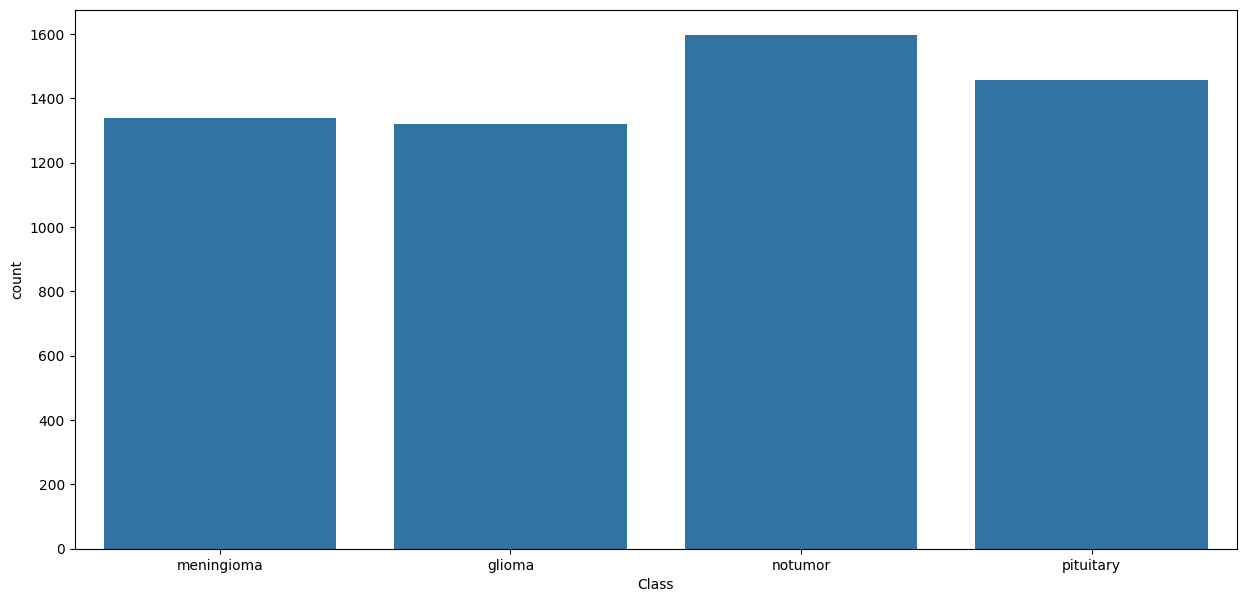

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

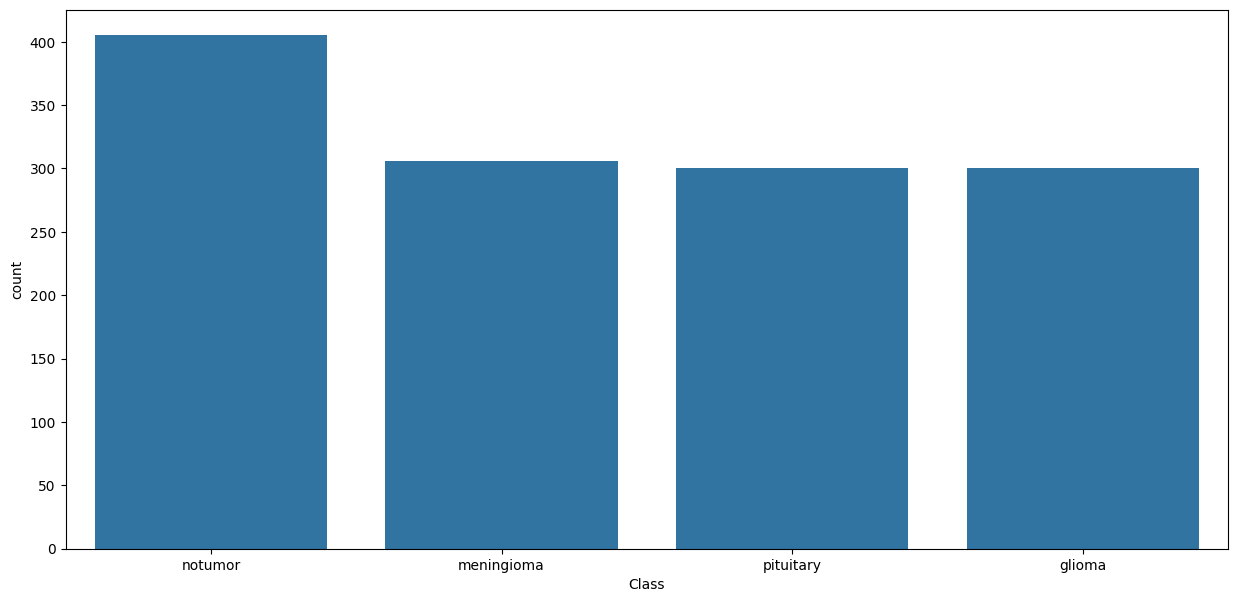

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.src.layers import Lambda
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [ ]:
valid_df

,Class Path,Class
660,/content/Testing/notumor/Te-no_0013.jpg,notumor
0,/content/Testing/meningioma/Te-me_0208.jpg,meningioma
265,/content/Testing/meningioma/Te-me_0123.jpg,meningioma
807,/content/Testing/notumor/Te-no_0130.jpg,notumor
1192,/content/Testing/pituitary/Te-pi_0263.jpg,pituitary
...,...,...
961,/content/Testing/notumor/Te-no_0274.jpg,notumor
90,/content/Testing/meningioma/Te-me_0235.jpg,meningioma
1292,/content/Testing/pituitary/Te-pi_0289.jpg,pituitary
1113,/content/Testing/pituitary/Te-piTr_0008.jpg,pituitary


In [ ]:
ts_df

,Class Path,Class
1258,/content/Testing/pituitary/Te-pi_0082.jpg,pituitary
1053,/content/Testing/pituitary/Te-pi_0232.jpg,pituitary
536,/content/Testing/glioma/Te-gl_0080.jpg,glioma
211,/content/Testing/meningioma/Te-me_0207.jpg,meningioma
940,/content/Testing/notumor/Te-no_0033.jpg,notumor
...,...,...
406,/content/Testing/glioma/Te-gl_0095.jpg,glioma
1302,/content/Testing/pituitary/Te-piTr_0009.jpg,pituitary
1112,/content/Testing/pituitary/Te-pi_0223.jpg,pituitary
589,/content/Testing/glioma/Te-gl_0183.jpg,glioma


In [ ]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
print(tr_df.columns)

Index(['Class Path', 'Class'], dtype='object')


In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

valid_gen = image_generator.flow_from_dataframe(valid_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=16,
  target_size=img_size,
  shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


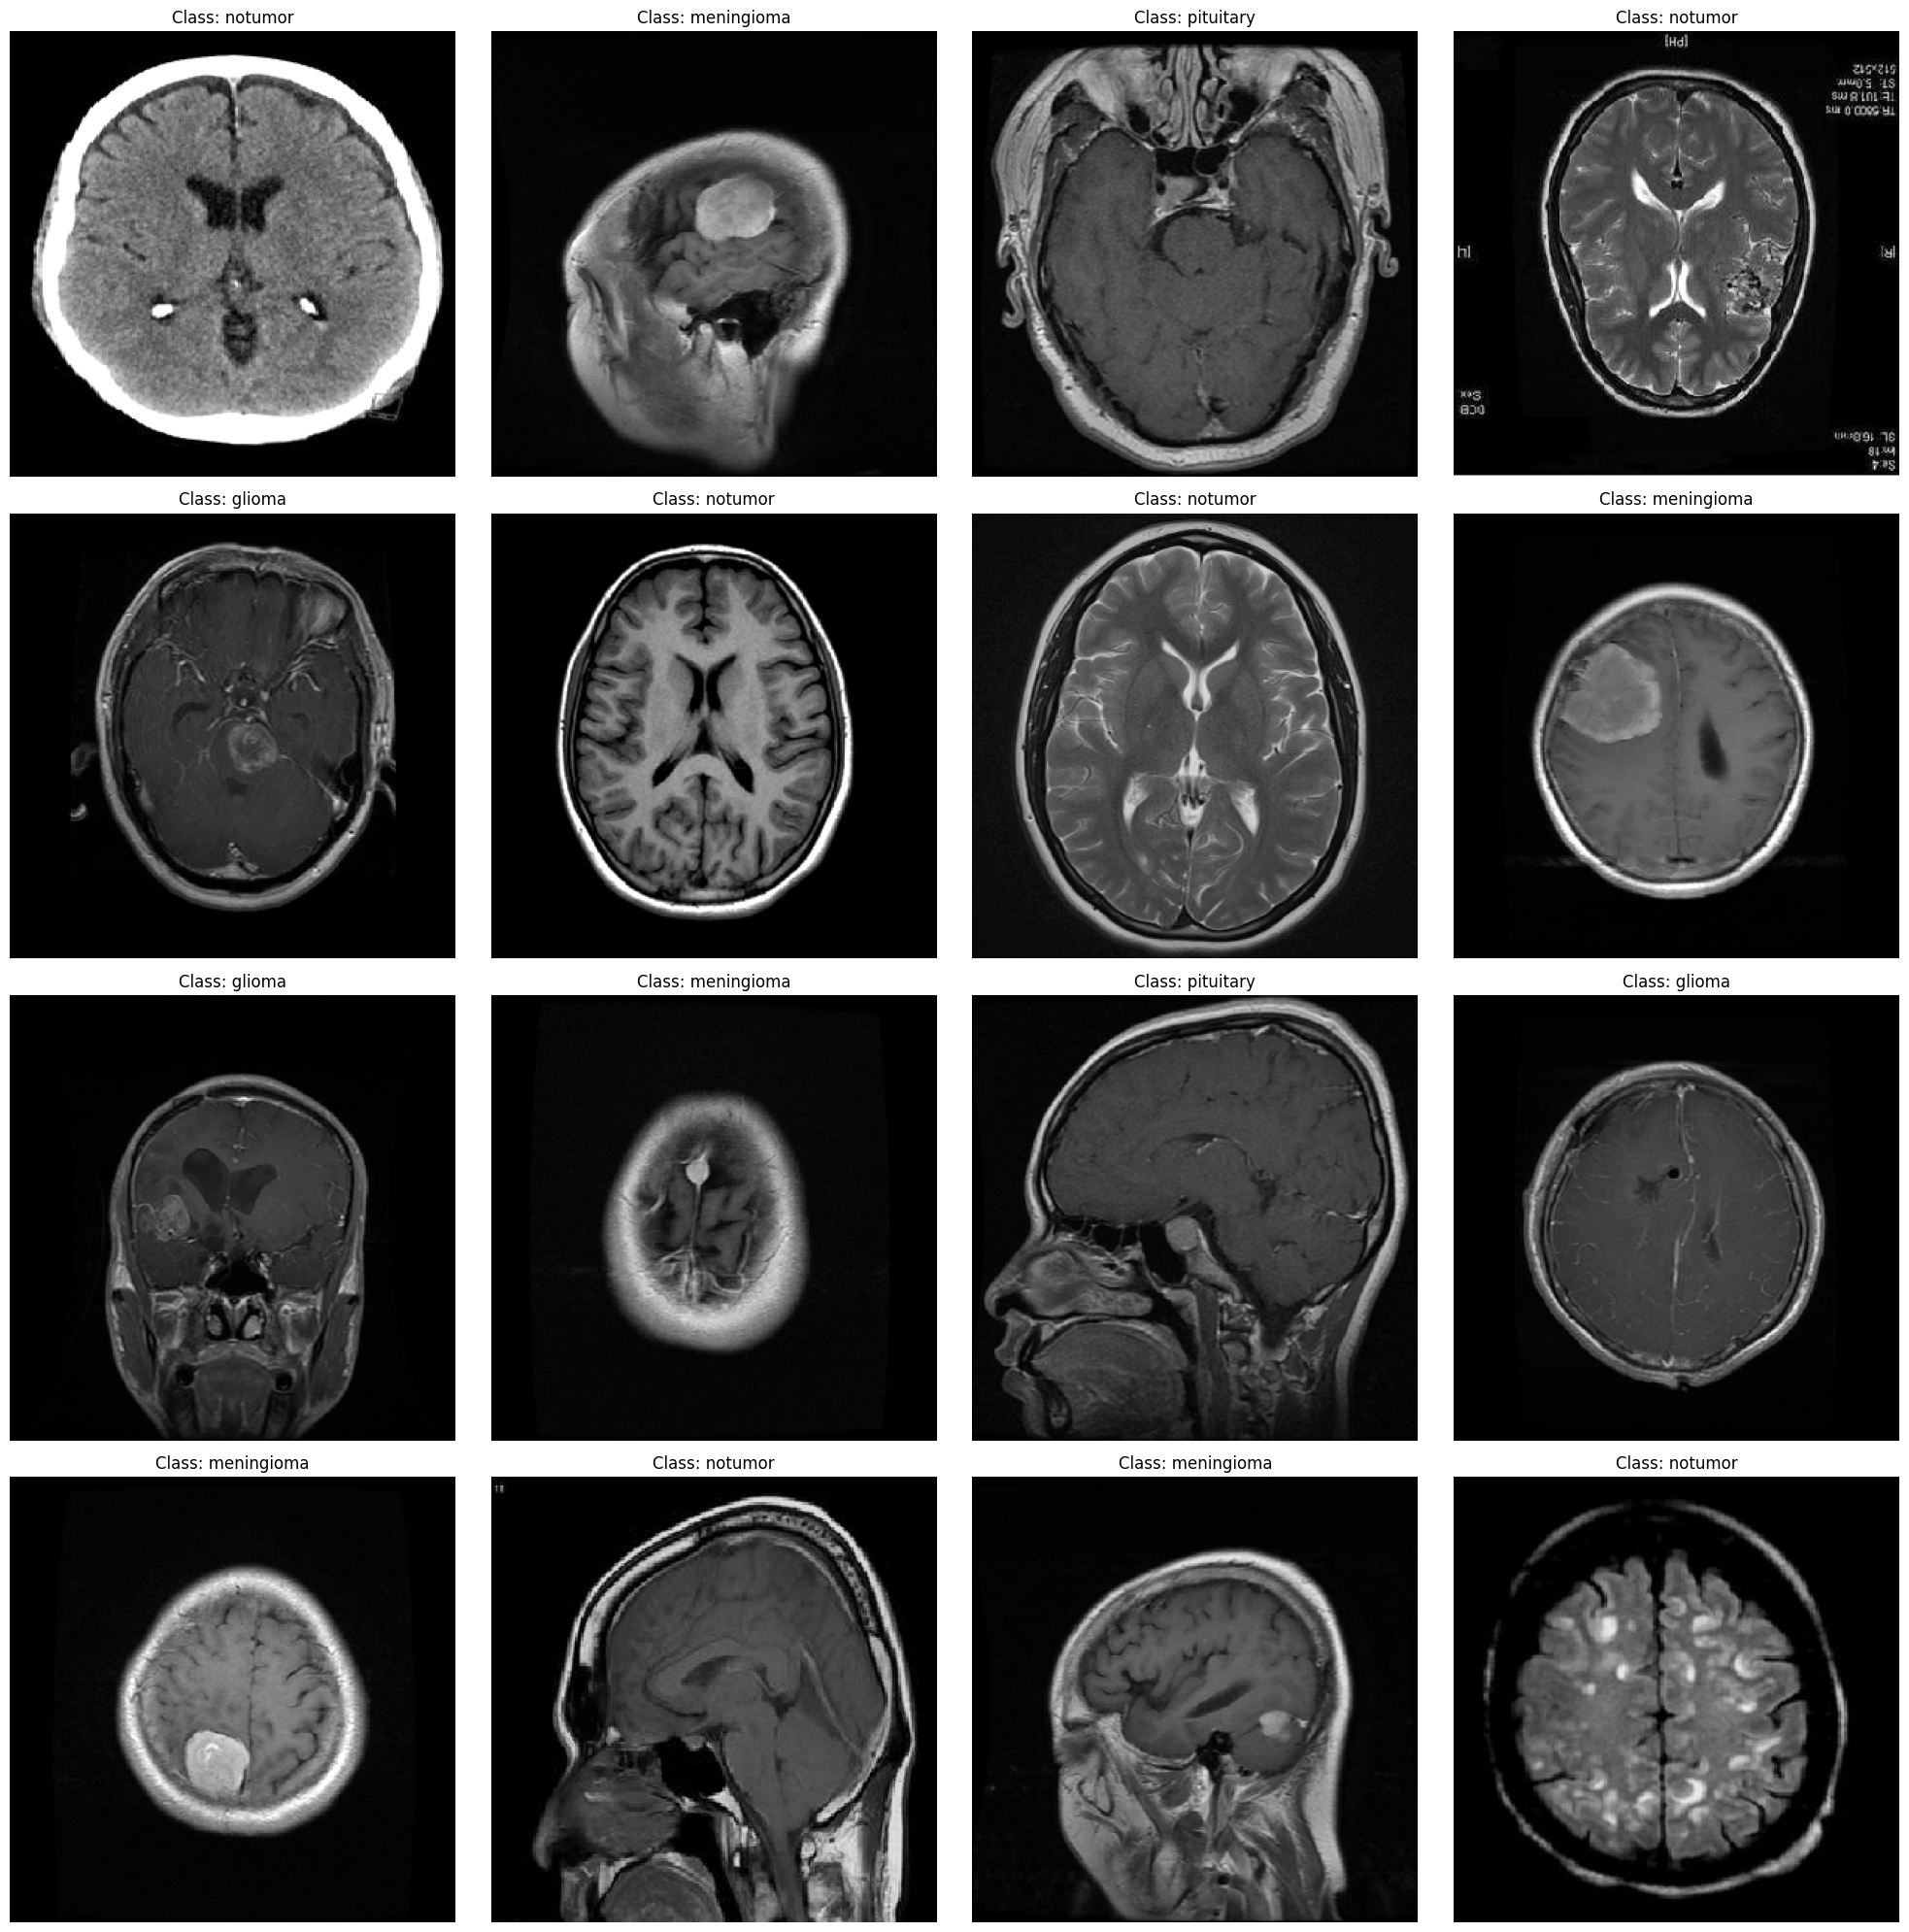

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indicies = list(tr_gen.class_indices.values())

  index_position = class_indicies.index(class_index)

  class_name = class_names[index_position]

  plt.title(f'Class: {class_name}')
  plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling="max")

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(rate=0.25),
    Dense(4, activation="softmax")
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy", Precision(), Recall()])

In [ ]:
hist = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 247s 987ms/step - accuracy: 0.8278 - loss: 0.5391 - precision: 0.8618 - recall: 0.7737 - val_accuracy: 0.9221 - val_loss: 0.1944 - val_precision: 0.9259 - val_recall: 0.9160
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 166s 730ms/step - accuracy: 0.9847 - loss: 0.0578 - precision: 0.9857 - recall: 0.9831 - val_accuracy: 0.9725 - val_loss: 0.0697 - val_precision: 0.9740 - val_recall: 0.9710
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 132s 729ms/step - accuracy: 0.9889 - loss: 0.0352 - precision: 0.9904 - recall: 0.9886 - val_accuracy: 0.9405 - val_loss: 0.2606 - val_precision: 0.9405 - val_recall: 0.9405
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 131s 727ms/step - accuracy: 0.9936 - loss: 0.0231 - precision: 0.9946 - recall: 0.9933 - val_accuracy: 0.9817 - val_loss: 0.0934 - val_precision: 0.9817 - val_recall: 0.9817
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 132s 730ms/step - accuracy: 0.9961 - loss: 0.0150 - precision: 0.9963 - recall: 0.9959 - val_accuracy: 0.9847 - val_los

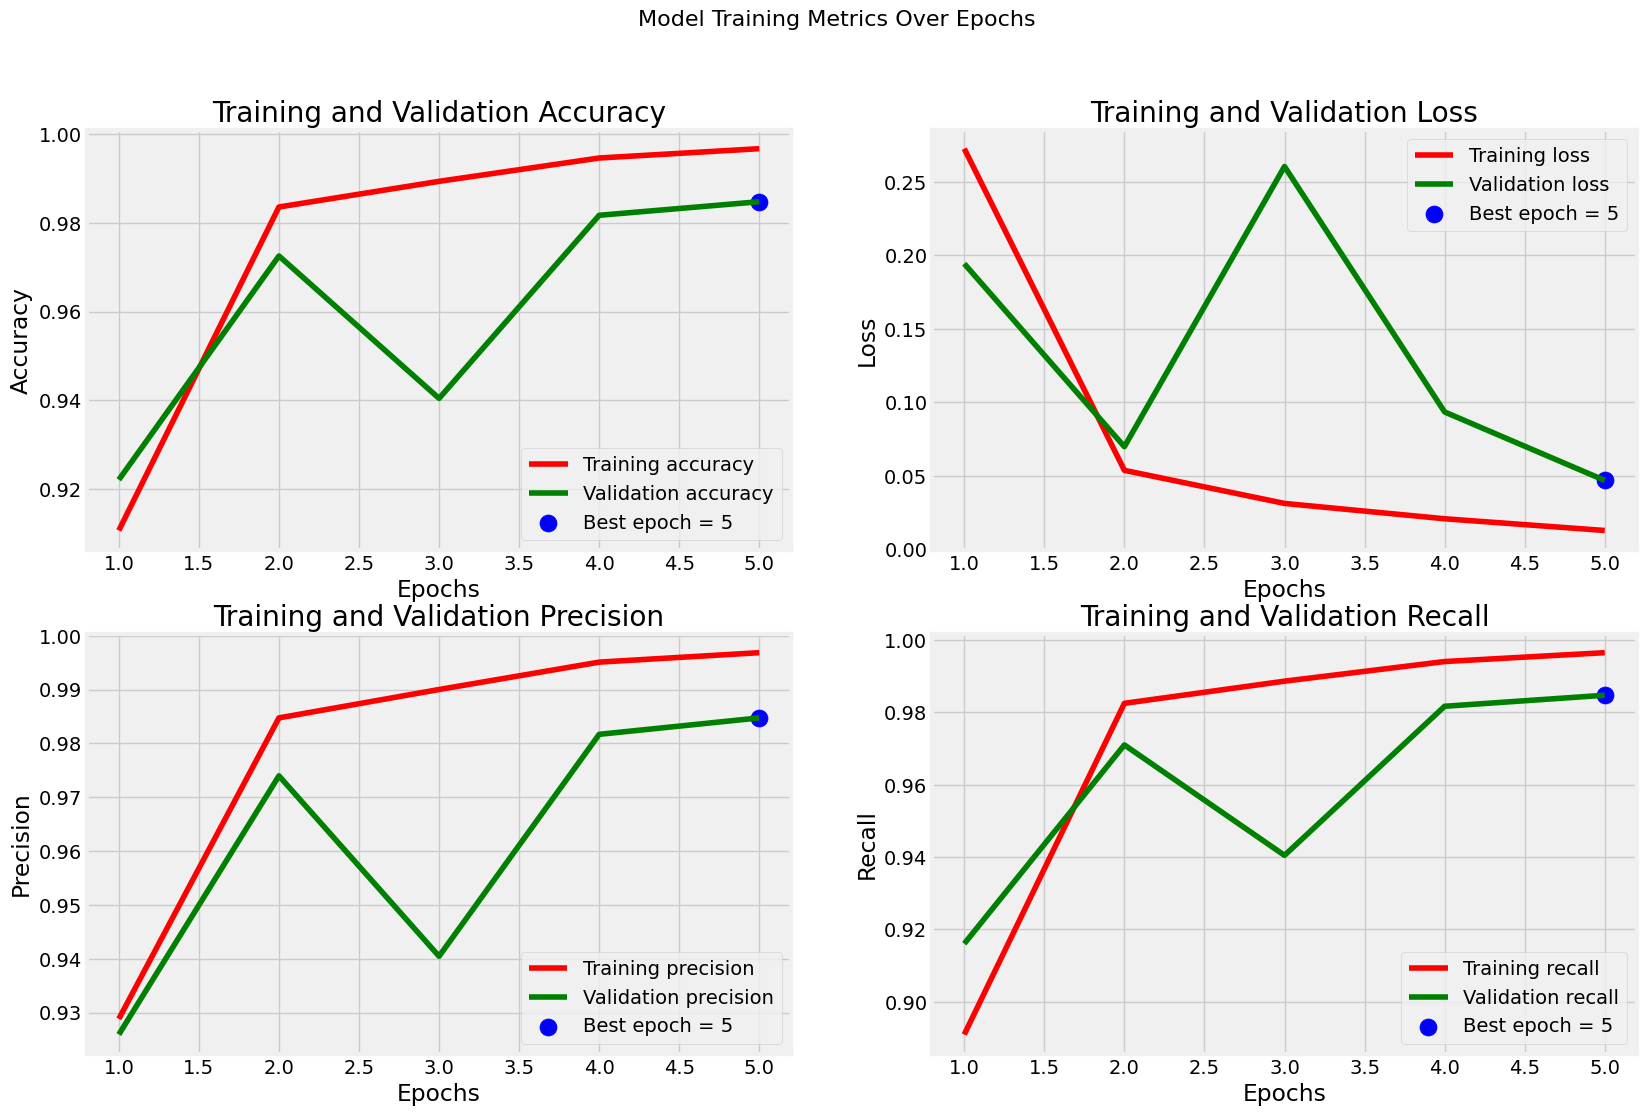

In [ ]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f"val_{m}"] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150,c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 241ms/step - accuracy: 1.0000 - loss: 3.8489e-04 - precision: 1.0000 - recall: 1.0000
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.9820 - loss: 0.0568 - precision: 0.9820 - recall: 0.9820
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 1.0000 - loss: 2.8160e-05 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9953 - loss: 0.0153 - precision: 0.9953 - recall: 0.9953
Train Accuracy: 100.00%
Train Loss: 0.0005

Validation Accuracy: 98.47%
Validation Loss: 0.0479


Test Accuracy: 99.70%
Test Loss: 0.0105


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step


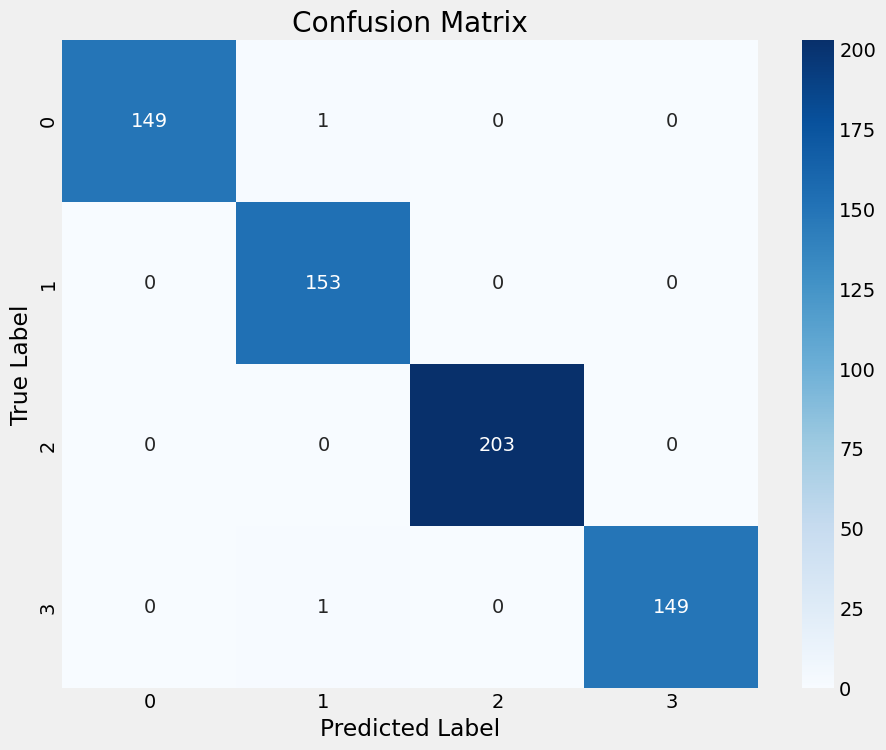

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> str:
    labels = list(class_dict.keys())
    plt.figure(figsize=(6, 8))

    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f'Input MRI Image\nPredicted: {predicted_class}')

    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel('Probability', fontsize=15)
    plt.title('Class Probabilities')

    ax = plt.gca()
    ax.bar_label(bars, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted Tumor Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


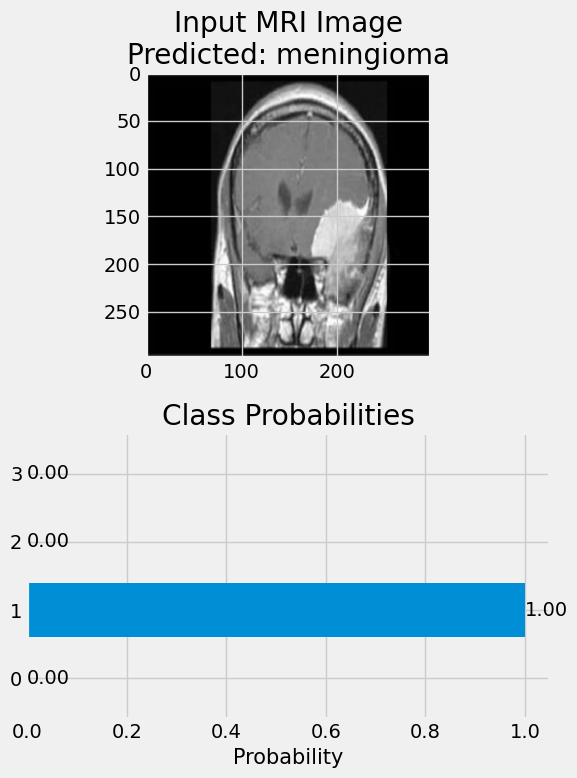


Predicted Tumor Type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


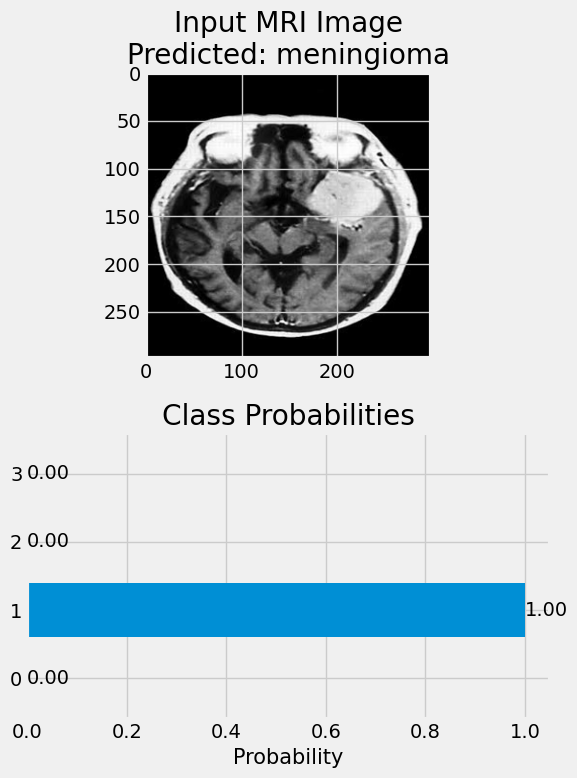


Predicted Tumor Type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


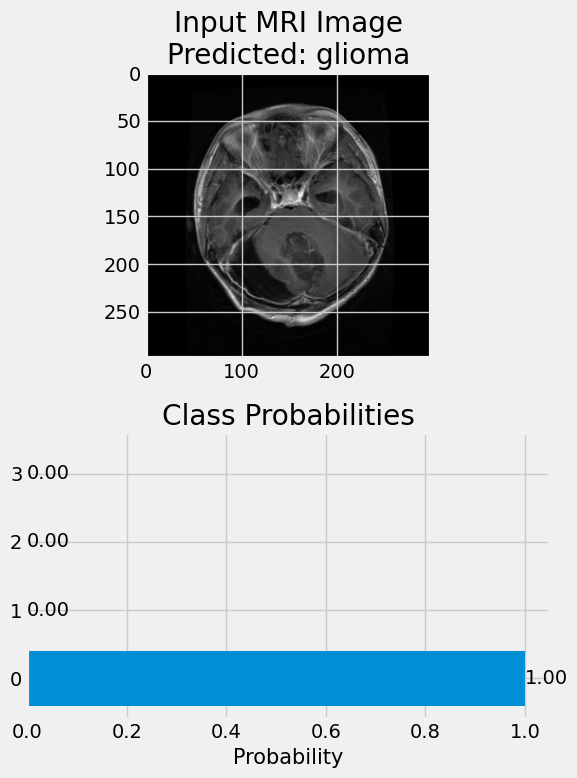


Predicted Tumor Type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


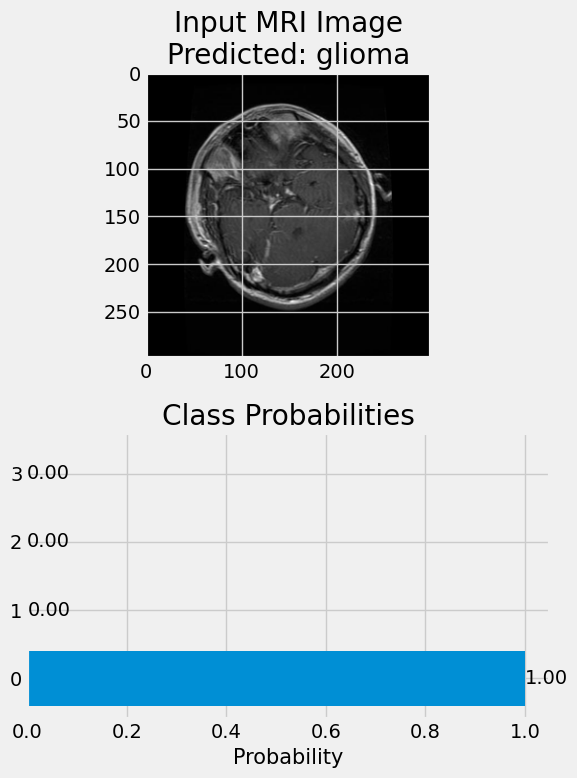


Predicted Tumor Type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0006.jpg")

In [ ]:
model.save_weights("trained_xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

valid_gen = image_generator.flow_from_dataframe(valid_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=batch_size,
  target_size=img_size,
)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
  x_col='Class Path',
  y_col="Class",
  batch_size=16,
  target_size=img_size,
  shuffle=False,
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.20))

cnn_model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax'))

cnn_model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall')
    ]
)
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = cnn_model.fit(tr_gen, epochs=8, validation_data=valid_gen, callbacks=[early_stopping])

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 62s 139ms/step - accuracy: 0.5622 - loss: 2.0515 - precision: 0.6834 - recall: 0.3768 - val_accuracy: 0.7160 - val_loss: 0.8587 - val_precision: 0.8032 - val_recall: 0.6107
Epoch 2/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 43s 118ms/step - accuracy: 0.7832 - loss: 0.7379 - precision: 0.8160 - recall: 0.7350 - val_accuracy: 0.8076 - val_loss: 0.6126 - val_precision: 0.8269 - val_recall: 0.7802
Epoch 3/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.8521 - loss: 0.5575 - precision: 0.8708 - recall: 0.8237 - val_accuracy: 0.8244 - val_loss: 0.6310 - val_precision: 0.8315 - val_recall: 0.8061
Epoch 4/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.8669 - loss: 0.4937 - precision: 0.8810 - recall: 0.8451 - val_accuracy: 0.8550 - val_loss: 0.4827 - val_precision: 0.8679 - val_recall: 0.8427
Epoch 5/8
357/357 ━━━━━━━━━━━━━━━━━━━━ 43s 119ms/step - accuracy: 0.8984 - loss: 0.4210 - precision: 0.9078 - recall: 0.8848 - val_accuracy: 0.8687 - val_loss: 0.

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


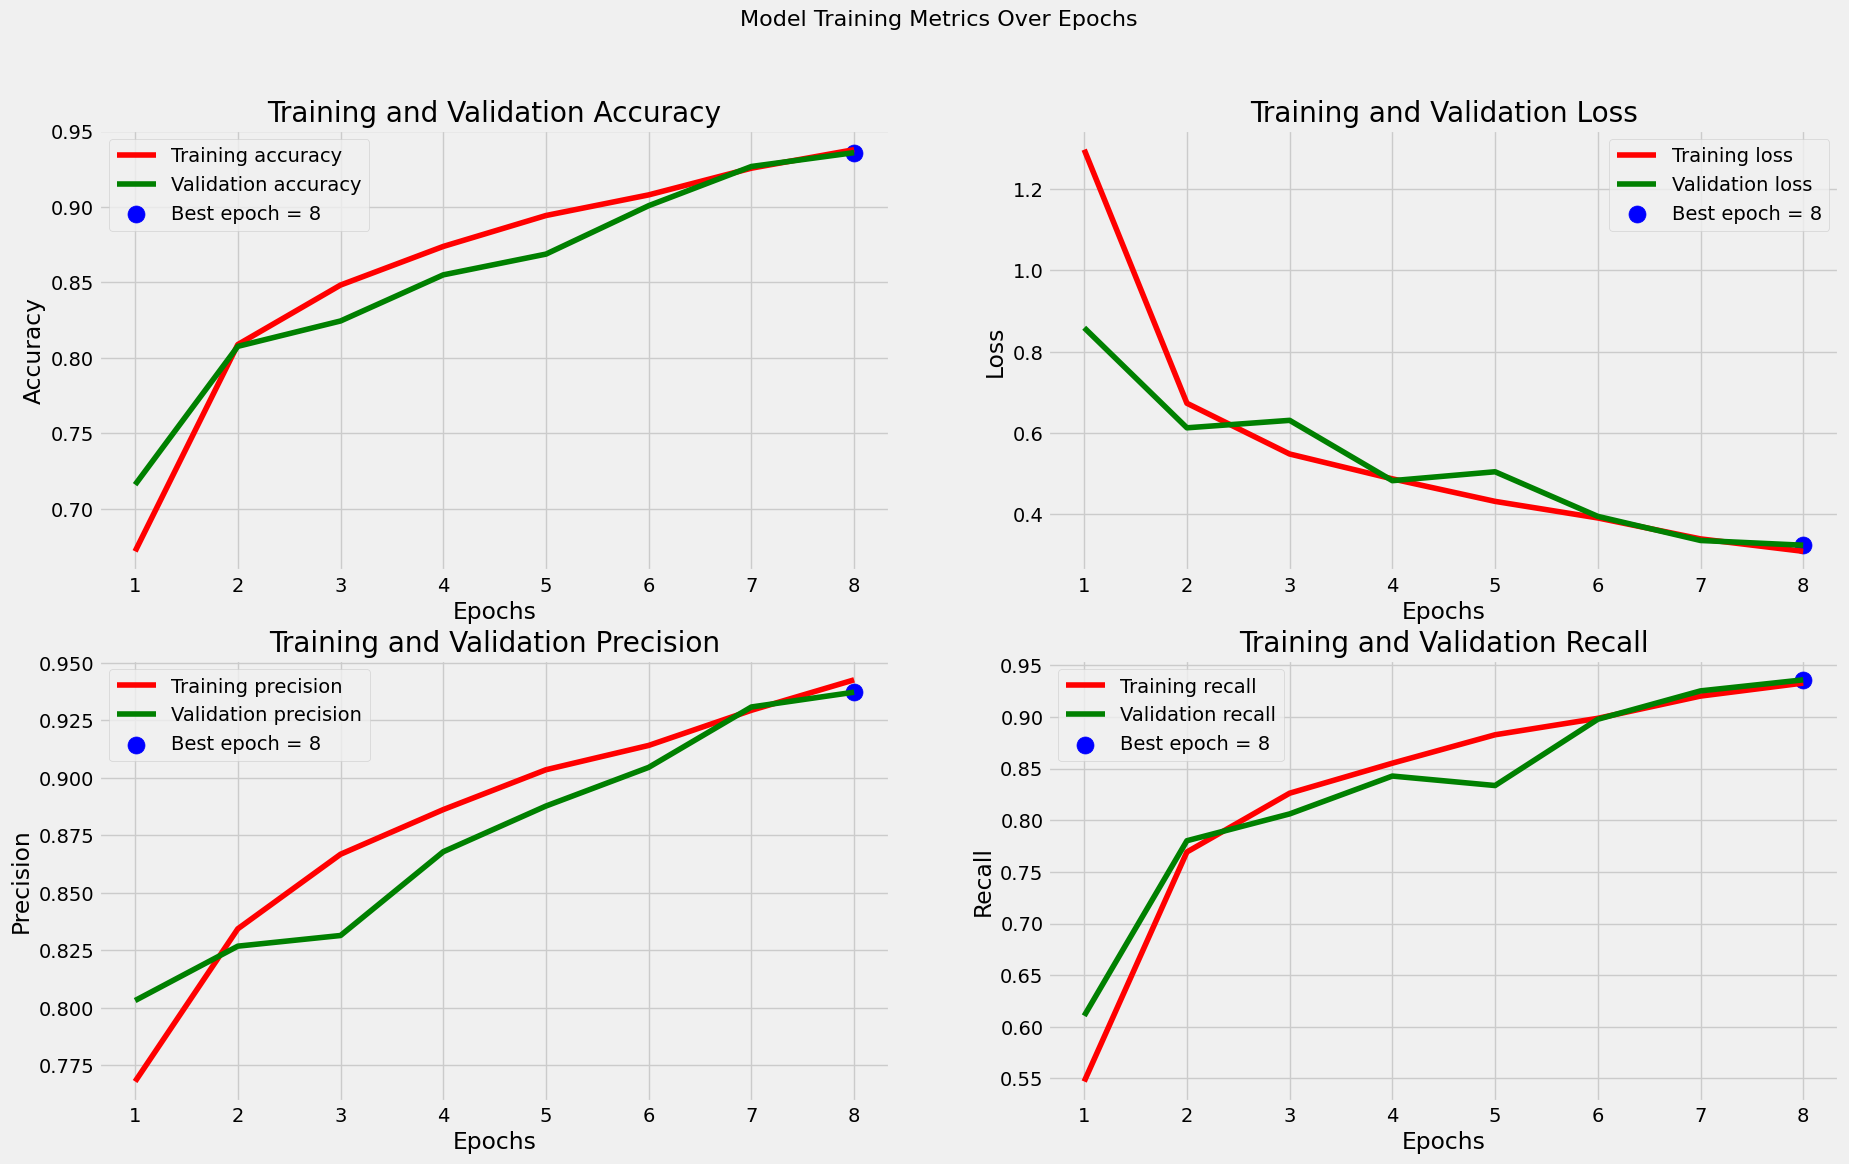

In [ ]:
metrics = ["accuracy", "loss", "precision", "recall"]
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f"val_{m}"] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])

    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150,c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step - accuracy: 0.9761 - loss: 0.2235 - precision: 0.9774 - recall: 0.9753
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9407 - loss: 0.3050 - precision: 0.9476 - recall: 0.9379
 5/41 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9406 - loss: 0.3068 - precision: 0.9388 - recall: 0.9121

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9361 - loss: 0.3088 - precision: 0.9373 - recall: 0.9296
Train Accuracy: 97.83%
Train Loss: 0.2156

Validation Accuracy: 93.44%
Validation Loss: 0.3236


Test Accuracy: 93.45%
Test Loss: 0.3048


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


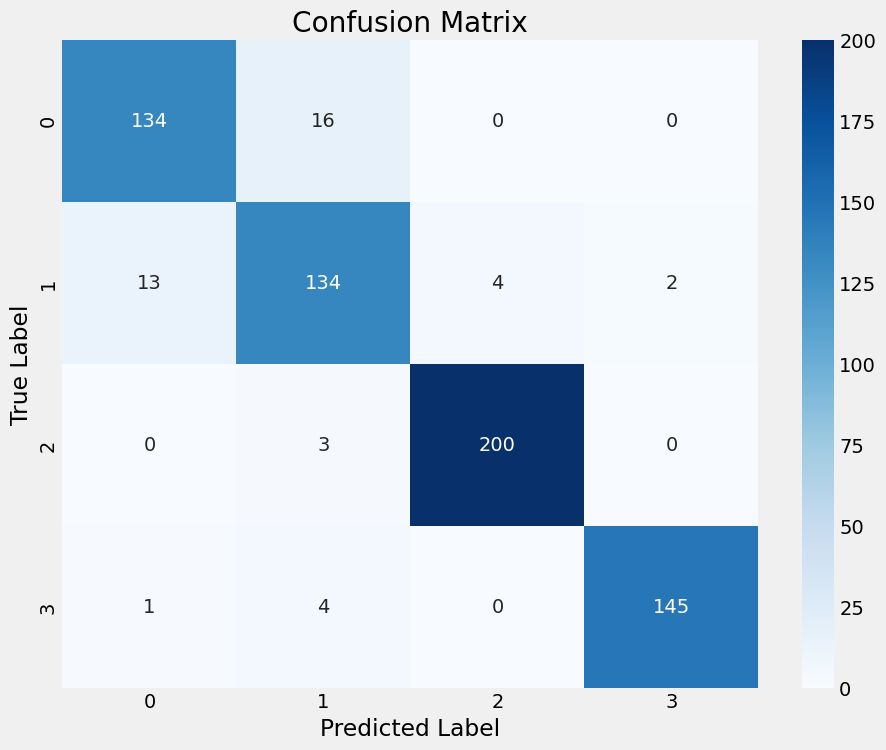

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       150
           1       0.85      0.88      0.86       153
           2       0.98      0.99      0.98       203
           3       0.99      0.97      0.98       150

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.94      0.93      0.93       656



In [ ]:
cnn_model.save("trained_cnn_model.h5")

Streamlit Web App

In [ ]:
! pip install streamlit pyngrok python-dotenv mistralai fpdf

In [104]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [105]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [106]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [107]:
%%writefile app.py
import streamlit as st
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
import os
from mistralai import Mistral
import PIL.Image
from fpdf import FPDF
import time
import datetime
import random

api_key = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=api_key)

output_dir = 'saliency_map'
os.makedirs(output_dir, exist_ok=True)

def create_pdf_report(prediction, confidence, result, saliency_map_path):
    class PDF(FPDF):
        def header(self):
            self.set_font("Arial", "B", 12)
            self.cell(0, 10, "Brain Tumor Classification App", align="C", ln=True)

        def footer(self):
            self.set_y(-15)
            self.set_font("Arial", "I", 8)
            self.cell(0, 10, f"Made by Dawit Zewdu @ December 2024", align="C")

    pdf = PDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    pdf.set_font("Arial", "B", 16)
    pdf.cell(0, 10, "Brain Tumor Classification Report", ln=True, align="C")
    pdf.ln(10)

    pdf.set_font("Arial", size=12)
    pdf.cell(0, 10, f"Date: {datetime.datetime.now().strftime('%Y-%m-%d')}", ln=True)
    pdf.cell(0, 10, f"Predicted Class: {result}", ln=True)
    pdf.cell(0, 10, f"Confidence: {confidence * 100:.2f}%", ln=True)
    pdf.ln(10)

    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 10, "Saliency Map:", ln=True)
    pdf.image(saliency_map_path, x=50, y=None, w=100)  
    pdf.ln(10)

    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 10, "Explanation:", ln=True)
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, txt=explanation)
    pdf.ln(10)

    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 10, "Previous History Cases:", ln=True)
    pdf.set_font("Arial", size=12)
    ex1 = generate_mock_case(prediction, confidence)
    ex2 = generate_mock_case(prediction, confidence)
    ex3 = generate_mock_case(prediction, confidence)
    cases = [
        ex1
    ]
    for case in cases:
        pdf.multi_cell(0, 10, txt=case)
        pdf.ln(10)

    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 10, "General Recommendations:", ln=True)
    pdf.set_font("Arial", size=12)
    recommendations = (
        "1. Consult a neurologist or medical professional for confirmation.\n"
        "2. Bring this report to your doctor's appointment for a more informed discussion.\n"
        "3. Follow your doctor's advice for further diagnostic tests or treatment options.\n"
        "4. Maintain a healthy lifestyle, including regular check-ups, to monitor your brain health."
    )
    pdf.multi_cell(0, 10, txt=recommendations)
    pdf.ln(10)

    pdf.set_font("Arial", "B", 12)
    pdf.cell(0, 10, "Cautionary Disclaimer:", ln=True)
    pdf.set_font("Arial", size=12)
    disclaimer = (
        "This report is generated for informational purposes only and must not replace a doctor's consultation. "
        "The predictions made by this app are based on a deep learning model and should not be considered a definitive diagnosis. "
        "We strongly recommend consulting a qualified medical professional for confirmation and further guidance."
        "The previous cases that are listed here are simulated using AI, please understand that those are not real cases."
    )
    pdf.multi_cell(0, 10, txt=disclaimer)
    pdf.ln(10)

    report_path = os.path.join(output_dir, 'report.pdf')
    pdf.output(report_path)
    return report_path



def generate_mock_case(model_prediction, confidence):
    prompt = f"""
    Generate a mock history case (cases that happened before) based on the AI prediction and patient information:
        model_prediction (str): The predicted class from the model -> {model_prediction}.
        confidence (float): The confidence level of the prediction -> {confidence * 100:.2f}

    Return a single-line realistic mock case description based on the inputed information.

    Here are some examples of mock cases:
      if {model_prediction} == 'glioma':
        "Example 1: Glioma detected with {confidence * 100:.2f}% confidence. Patient exhibited early-stage symptoms and responded well to treatment."
      elif {model_prediction} == 'meningioma':
        "Example 2: Meningioma detected with {confidence * 100:.2f}% confidence. MRI indicated abnormal growth in the frontal lobe."
      elif {model_prediction} == 'pituitary':
        "Example 4: Pituitary tumor detected with {confidence * 100:.2f}% confidence. Patient underwent surgery and showed improvement post-treatment."
      else:
        "Example 3: No tumor detected. MRI confirmed no significant abnormalities."

    """


    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt], stream=False)

    return response.text


def generate_explanation_gemini(img_path, model_prediction, confidence):

    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    – Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
    in light cyan, those are the regions where the model is focusing on.
    – Explain possible reasons why the model made the prediction it did.
    – Don’t mention anything like "The saliency map highlights the regions the model is focusing on, which are in light cyan"
    in your explanation.
    – Keep your explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step.
    """

    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text

def generate_explanation_pixtral(img_path, model_prediction, confidence):

  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    – Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
    in light cyan, those are the regions where the model is focusing on.
    – Explain possible reasons why the model made the prediction it did.
    – Don’t mention anything like "The saliency map highlights the regions the model is focusing on, which are in light cyan"
    in your explanation.
    – Keep your explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step.
    """

  api_key = os.getenv["PIXTRAL_API_KEY"]
  img = PIL.Image.open(img_path)

  model = "pixtral-12b-2409"

  client = Mistral(api_key=api_key)

  chat_response = client.chat.complete(
      model= model,
      messages = [
          {
              "role": "user",
              "content": prompt,
          },
      ]
  )

  response = chat_response.choices[0].message.content


  return response


def generate_chat_response_gemini(user_question, user_type, model_prediction, confidence, img_path):
  prompt = f"""You are an expert neurologist specializing in brain tumors. You have been asked to interpret and explain the results of an MRI scan.
  The scan was classified by a deep learning model as one of four categories: glioma, meningioma, pituitary tumor, or no tumor.
  The model predicts this MRI scan to be of class '{model_prediction}' with a confidence level of {confidence * 100}%.

  The user is a {user_type} and has asked the following question: {user_question}.

  When responding, keep the following in mind:

  If the user is a patient, avoid medical jargon and provide an explanation that is clear and accessible to someone with no medical background. Keep it simple and reassuring.
  Do not adopt a formal doctor's role; just provide information based on the question without suggesting appointments, further steps, or treatment options.
  Use a step-by-step approach in your response to ensure clarity and thoroughness.
  Be brief in your responses.

  Let's think step by step about this. Verify step by step.

  """
  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img], stream=True)

  for chunk in response:
    yield chunk.text



def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    gradients = cv2.resize(gradients, img_size)

    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])** 2 + (y - center[1])** 2 <= radius**2

    gradients = gradients * mask

    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    heatmap = cv2.resize(heatmap, img_size)

    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, 'wb') as f:
      f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_map/{uploaded_file.name}'

    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img


def load_xception_model(path):
  img_shape = (299, 299, 3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  model.compile(Adamax(learning_rate=0.01),
                loss="categorical_crossentropy",
                metrics=['accuracy', Precision(), Recall()])
  model.load_weights(path)

  return model


st.set_page_config(
    page_title="Brain Tumor Classification",
    page_icon="🧠",
    layout="wide",
    initial_sidebar_state="expanded")

st.title('Brain Tumor Classification')

col = st.columns((1.5, 4.5, 2), gap='medium')


with col[1]:
  st.write("Upload an image of a brain MRI scan to classify.")
  uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])


  if uploaded_file is not None:
      selected_model = st.radio(
          "Select a model:",
          ("Transfer Learning - Xception", "Custom CNN")
      )

      if selected_model == "Transfer Learning - Xception":
        with st.spinner('Generating prediction...'):
          model = load_xception_model('/content/trained_xception_model.weights.h5')
          img_size = (299, 299)
      else:
        with st.spinner('Generating prediction...'):
          model = load_model('/content/trained_cnn_model.h5')
          img_size = (224, 224)


      labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
      img = image.load_img(uploaded_file, target_size=img_size)
      img_array = image.img_to_array(img)
      img_array = np.expand_dims(img_array, axis=0)
      img_array /= 255.0

      prediction = model.predict(img_array)

      class_index = np.argmax(prediction[0])
      result = labels[class_index]

with col[0]:
  if uploaded_file is not None:
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    colors = ['blue' if label != result else 'red' for label in sorted_labels]

    fig = go.Figure()

    gap_factor = 2 
    dsf = 0.01  

    for i, (label, prob) in enumerate(zip(sorted_labels, sorted_probabilities)):
      start_y = 1 - ((i + 1) / len(sorted_labels)) + gap_factor / 2
      end_y = 1 - (i / len(sorted_labels)) - gap_factor / 2

      fig.add_trace(go.Pie(
            values=[prob * 100, 100 - prob * 100],
            hole=0.6,
            marker=dict(colors=[colors[i], 'black']),
            domain={'y': [1 - (i + 1) / len(sorted_labels), 1 - i / len(sorted_labels)], 'x': [0, 1]},
            showlegend=False
        ))

    fig.update_layout(
        title='Tumor Probabilities',
        height=1100,
        width=200,
        annotations=[
            dict(text=f'{sorted_labels[i]}<br>{prob * 100:.2f}%', x=0.5, y=1 - (i + 0.5) / len(sorted_labels), showarrow=False)
            for i, prob in enumerate(sorted_probabilities)
        ]
    )

    st.plotly_chart(fig)


with col[1]:
  if uploaded_file is not None:
    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    col1, col2 = st.columns(2)
    with col1:
      st.image(uploaded_file, caption="Uploaded Image", use_container_width=True)
    with col2:
      st.image(saliency_map, caption="Saliency Map", use_container_width=True)

    result_container = st.container()
    result_container = st.container()

    result_container.markdown(
    f"""
    <div style="background: linear-gradient(135deg, #1c1c1c, #333333); color: #ffffff; padding: 30px; border-radius: 15px; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.5);">
    <div style="display: flex; justify-content: space-between; align-items: center;">
        <div style="flex: 1; text-align: center;">
            <h3 style="color: #e0e0e0; margin-bottom: 10px; font-size: 20px; text-transform: uppercase; letter-spacing: 1px;">Prediction</h3>
            <h3 style="font-size: 36px; font-weight: 800; color: #FF4C4C; margin: 0; text-shadow: 0 2px 5px rgba(255, 76, 76, 0.6);">
                {result}
            </h3>
        </div>
        <div style="width: 2px; height: 80px; background: linear-gradient(180deg, #ffffff, #888888); margin: 0 20px;"></div>
        <div style="flex: 1; text-align: center;">
            <h3 style="color: #e0e0e0; margin-bottom: 10px; font-size: 20px; text-transform: uppercase; letter-spacing: 1px;">Confidence</h3>
            <h3 style="font-size: 36px; font-weight: 800; color: #4CAFFF; margin: 0; text-shadow: 0 2px 5px rgba(76, 175, 255, 0.6);">
                {prediction[0][class_index] * 100 :.2f}%
            </h3>
        </div>
    </div>
    </div>

      """,
      unsafe_allow_html=True
    )



with col[2]:
  if uploaded_file is not None:

    st.write("## Explanation")
    saliency_map_path = f'saliency_map/{uploaded_file.name}'

    llm_model_for_exp = st.radio("Select a model to explain the images to you:", ("Please select...", "gemini-1.5-flash", "pixtral-12b-2409"))
    if llm_model_for_exp == "gemini-1.5-flash":
      with st.spinner('Generating explantion...'):
        explanation = generate_explanation_gemini(saliency_map_path, result, prediction[0][class_index])
        st.write(explanation)
    elif llm_model_for_exp == "pixtral-12b-2409":
      with st.spinner('Generating explantion...'):
        explanation = generate_explanation_pixtral(saliency_map_path, result, prediction[0][class_index])
        st.write(explanation)
    else:
      st.warning("Please select your model to generate explanation.")
      explanation = ""

    if explanation != "":
        if "downloaded" not in st.session_state:
            st.session_state.downloaded = False
            st.session_state.show_message = False

        st.write("## Download Report")
        with st.spinner('Generating report...'):

            report_path = create_pdf_report(
                    prediction=prediction[0],
                    confidence=prediction[0][class_index],
                    result=result,
                    saliency_map_path=saliency_map_path
                )
        with open(report_path, "rb") as f:
              if st.download_button(
                label="Download Report as PDF",
                data=f,
                file_name="Brain_Tumor_Classification_Report.pdf",
                mime="application/pdf"
              ):


                st.session_state.downloaded = True
                st.session_state.show_message = True

        if st.session_state.downloaded:
          st.success("The report has been successfully downloaded!")
          time.sleep(5)  
          st.session_state.show_message = False



with col[2]:
  if uploaded_file is not None:
    st.write("## MRI Chat")
    user_type = st.radio("I am the:", ("Please select...", "Patient", "Doctor"))

    if user_type == "Please select...":
        st.warning("Please select your user type before asking a question.")
    else:

      st.title("MRI Bot")

      with st.container():
          st.markdown("""
              <style>
              .chat-container {
                  height: 400px;
                  display: flex;
                  flex-direction: column;
                  justify-content: flex-end;
                  overflow-y: auto;
                  border: 1px solid #ccc;
                  padding: 10px;
              }
              </style>
          """, unsafe_allow_html=True)

          chat_container = st.empty()
          with chat_container.container():
              if "messages" not in st.session_state:
                  intro_message = "Is there anything more you would like me to explain about the MRI Scan?"
                  st.session_state.messages = [{"role": "assistant", "content": intro_message}]

              for message in st.session_state.messages:
                  with st.chat_message(message["role"]):
                      st.markdown(message["content"])

          user_question = st.chat_input("Ask a follow question about the MRI scan")
          if user_question:
              st.session_state.messages.append({"role": "user", "content": user_question})

              with chat_container.container(height=400):
                  for message in st.session_state.messages:
                      with st.chat_message(message["role"]):
                          st.markdown(message["content"])

                  with st.chat_message("assistant"):
                      with st.spinner('Generating response...'):
                          full_response = ''
                          for response in generate_chat_response_gemini(user_question, user_type, result, prediction[0][class_index], saliency_map_path):
                              full_response += response
                              st.markdown(response)

                  st.session_state.messages.append({"role": "assistant", "content": full_response})


Overwriting app.py


In [108]:
thread = Thread(target=run_streamlit)
thread.start()

In [110]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://a703-104-155-200-192.ngrok-free.app" -> "http://localhost:8501"


In [103]:
# used for disconnecting the ngrok tunnels
 #tunnels = ngrok.get_tunnels()
 #for tunnel in tunnels:
   #ngrok.disconnect(tunnel.public_url)
   

Closing tunnel: https://9a98-104-155-200-192.ngrok-free.app -> http://localhost:8501
